<a href="https://colab.research.google.com/github/sajacaros/bootcamp_colab/blob/main/Linear_Regression_Python_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12.0, 9.0)
from sklearn.datasets import make_regression

# Generate Data
x, y = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=5.0, random_state=42)
y_ = y.reshape(-1, 1)
data = pd.DataFrame({"x" : x.reshape(-1, ), "y" : y})
data

,x,y
0,-1.758739,-31.113105
1,1.031845,10.393095
2,-0.487606,-13.048431
3,0.186454,-0.433708
4,0.725767,12.630296
...,...,...
995,-1.918771,-27.321248
996,0.482472,10.835759
997,0.241962,6.059165
998,1.366874,30.125283


<Axes: xlabel='x', ylabel='y'>

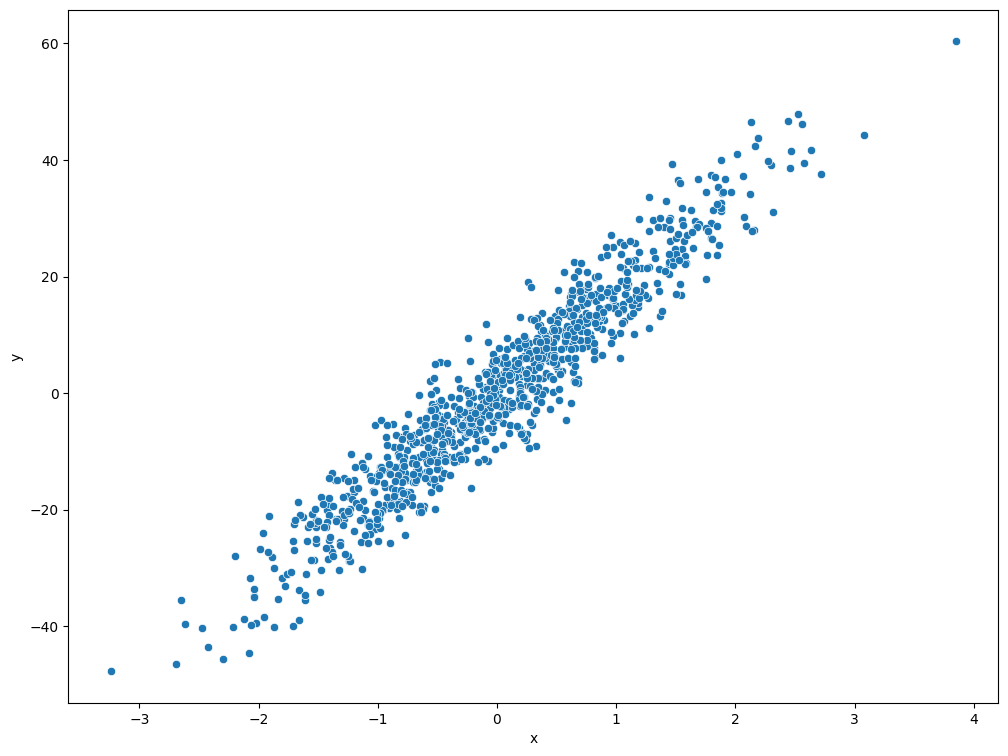

In [ ]:
# Data visualization
sns.scatterplot(data=data, x='x', y='y')

In [ ]:
# Make Gradient Descent

def gradient_descent(w=0.1, b=0.1, learning_rate=1e-2, max_iter=100, tol=1e-4):

    '''
        - 2차원에서의 단변량 Linear Regression 모델의 gradient descent algorithm을 구현합니다.
        - y = wx + b로 정의되며, learning_rate를 입력받아 epochs 만큼 weight update를 진행합니다.
        - max_iter만큼 진행하다가 주어진 max_iter전에 수렴한 것 같다면 멈춰도 됩니다.
        - 수렴 조건은 업데이트 되는 loss가 tol 이하일 때를 의미합니다.
    '''

    ## TO-DO ##
    # gradient descent algorithm 구현하기

    def gradient(w_, b_):
        grad_w = 2 * x ** 2 * w_ - 2 * (x*y_ + x*b)
        grad_b = 2 * b_ - 2 * (y_ + w*x)
        return np.sum(grad_w), np.sum(grad_b)

    def mean_squared_error(y, y_hat):
        return np.mean(np.square(y - y_hat))

    def f_(w, b):
        return w * x + b

    for idx in range(max_iter):
        delta_w, delta_b = gradient(w, b)
        w = w - learning_rate * delta_w
        b = b - learning_rate * delta_b
        y_hat = f_(w, b)
        mse = mean_squared_error(y_, y_hat)
        if (idx+1)%50 == 0:
            print(f"{idx}'s mse : {mse}")
        if mse < tol:
            print(f"{idx}th, mse({mse}) < tol({tol}), w : {w}, b : {b}")
            break

    return w, b

In [ ]:
w, b = gradient_descent(max_iter=10000, learning_rate=0.0001, tol=24.921862997357138)
print(f'w : {w}, b : {b}')

20th, mse(24.91875316190184) < tol(24.921862997357138), w : 16.51294906334569, b : 0.6456679416443055
w : 16.51294906334569, b : 0.6456679416443055


<Axes: xlabel='x', ylabel='y'>

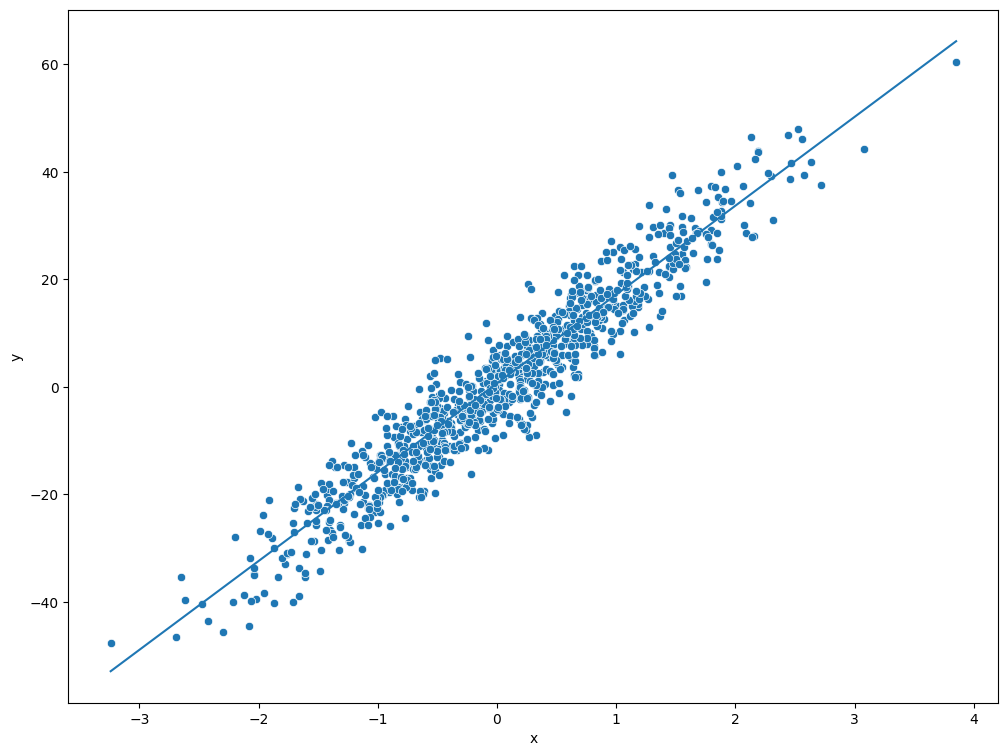

In [ ]:
# Visualize Result

sns.scatterplot(data=data, x='x', y='y')
sns.lineplot(x=data['x'], y=w*data['x'] + b)